In [93]:
%matplotlib inline
import pandas as pd
import numpy as np
#import googlemaps
import gmaps
import gmaps.datasets
import geopandas as gpd
#import matplotlib as plt
import matplotlib.pyplot as plt
import os
import plotly.plotly as py
import plotly.tools as tls

from config import g_key
gmaps.configure(api_key = g_key)

In [4]:
data = pd.read_csv('source_files/Fire_Data_for_mapping.csv', encoding = "ISO-8859-1", low_memory=False, index_col = 'OBJECTID')
data = data.fillna('')                   # fill empty entries with ''
print(list(data))                        # print Variable Name
data.head()                              # show some data

['Zip_num', 'address', 'address2', 'apt_room', 'arrive_date_time', 'cleared_date_time', 'dispatch_date_time', 'exposure', 'incident_number', 'incident_type', 'incident_type_description', 'platoon', 'station', 'Longitude', 'Latitude', 'Year', 'Date', 'Arr Time', 'Seconds', 'Incident']


,Zip_num,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
OBJECTID,,,,,,,,,,,,,,,,,,,,
474769,27603,"8332 SHILOH CREEK CT RALEIGH, NC 27603",,,10/19/2013 21:52,10/19/2013 21:59,10/19/2013 21:47,0,13-0030918,150,Outside rubbish fire Other,B,22,-78.53732007,35.89162234,2013,10/19/2013,0 days 00:05:00.000000000,300,Fire
474770,27615,"7513 IDOLBROOK LN RALEIGH, NC 27615",,,2/14/2014 21:49,2/14/2014 21:51,2/14/2014 21:46,0,14-0004846,510,Person in distress Other,A,4,-78.64763064,35.87818584,2014,2/14/2014,0 days 00:03:00.000000000,180,Service Call
474771,27601,"1205 S BLOODWORTH ST RALEIGH, NC 27601",,,4/29/2012 5:17,4/29/2012 5:38,4/29/2012 5:16,0,12-0011779,440,Electrical wiring/equipment problem Other,A,1,-78.63397664,35.76538782,2012,4/29/2012,0 days 00:01:00.000000000,60,Hazardous Condition (No Fire)
474772,27601,"7628 VALVIEW ST RALEIGH, NC 27601",,,4/28/2012 23:46,4/28/2012 23:52,4/28/2012 23:43,0,12-9010131,561,Unauthorized burning,A,18,-78.69139555,35.88444729,2012,4/28/2012,0 days 00:03:00.000000000,180,Service Call
474773,27603,"4201 MANGROVE DR RALEIGH, NC 27603",,,1/26/2014 22:35,1/26/2014 22:38,1/26/2014 22:31,0,14-0002916,520,Water problem Other,B,28,-78.51656019,35.87272475,2014,1/26/2014,0 days 00:04:00.000000000,240,Service Call


In [5]:
center_lat = '35.787743'
center_long = '-78.644257'
print('center = ',center_lat,center_long)

center =  35.787743 -78.644257


In [6]:
fire_loc = pd.DataFrame(data)
fire_loc = fire_loc[fire_loc.Latitude != 'missing']
fire_loc['Latitude'] = pd.to_numeric(fire_loc['Latitude'])
fire_loc['Longitude'] = pd.to_numeric(fire_loc['Longitude'])

fire_loc.head()

,Zip_num,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
OBJECTID,,,,,,,,,,,,,,,,,,,,
474769,27603,"8332 SHILOH CREEK CT RALEIGH, NC 27603",,,10/19/2013 21:52,10/19/2013 21:59,10/19/2013 21:47,0,13-0030918,150,Outside rubbish fire Other,B,22,-78.537320,35.891622,2013,10/19/2013,0 days 00:05:00.000000000,300,Fire
474770,27615,"7513 IDOLBROOK LN RALEIGH, NC 27615",,,2/14/2014 21:49,2/14/2014 21:51,2/14/2014 21:46,0,14-0004846,510,Person in distress Other,A,4,-78.647631,35.878186,2014,2/14/2014,0 days 00:03:00.000000000,180,Service Call
474771,27601,"1205 S BLOODWORTH ST RALEIGH, NC 27601",,,4/29/2012 5:17,4/29/2012 5:38,4/29/2012 5:16,0,12-0011779,440,Electrical wiring/equipment problem Other,A,1,-78.633977,35.765388,2012,4/29/2012,0 days 00:01:00.000000000,60,Hazardous Condition (No Fire)
474772,27601,"7628 VALVIEW ST RALEIGH, NC 27601",,,4/28/2012 23:46,4/28/2012 23:52,4/28/2012 23:43,0,12-9010131,561,Unauthorized burning,A,18,-78.691396,35.884447,2012,4/28/2012,0 days 00:03:00.000000000,180,Service Call
474773,27603,"4201 MANGROVE DR RALEIGH, NC 27603",,,1/26/2014 22:35,1/26/2014 22:38,1/26/2014 22:31,0,14-0002916,520,Water problem Other,B,28,-78.516560,35.872725,2014,1/26/2014,0 days 00:04:00.000000000,240,Service Call


In [7]:
len(fire_loc)

158421

In [8]:
locations = fire_loc[['Latitude', 'Longitude']]
fig = gmaps.figure(map_type='TERRAIN')
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 5
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [20]:
fp = 'Shp_files/Zip_Codes.shp'

map_df = gpd.read_file(fp)
#map_df.ZIPNUM.astype(float)
map_df.head()

,OBJECTID,ZIPNAME,ZIPNUM,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,14,YOUNGSVILLE,27596.0,YOUNGSVILLE 27596,YOUNGSVILLE,5.895366e+07,36862.720908,None,"POLYGON ((2185788.569720805 795376.804115817, ..."
1,15,RALEIGH,27616.0,RALEIGH 27616,RALEIGH,6.369874e+08,200568.559138,None,"POLYGON ((2124923.251776129 764611.3274791688,..."
2,16,RALEIGH,27612.0,RALEIGH 27612,RALEIGH,4.245758e+08,151746.618810,None,"POLYGON ((2077612.405012071 776688.0002584159,..."
3,17,WENDELL,27591.0,WENDELL 27591,WENDELL,1.324757e+09,257124.620339,2018-01-22T13:29:24.000Z,"POLYGON ((2204915.446666628 742273.3280983716,..."
4,18,RALEIGH,27609.0,RALEIGH 27609,RALEIGH,3.037805e+08,101063.786786,None,"POLYGON ((2101516.987946332 755795.6392789632,..."


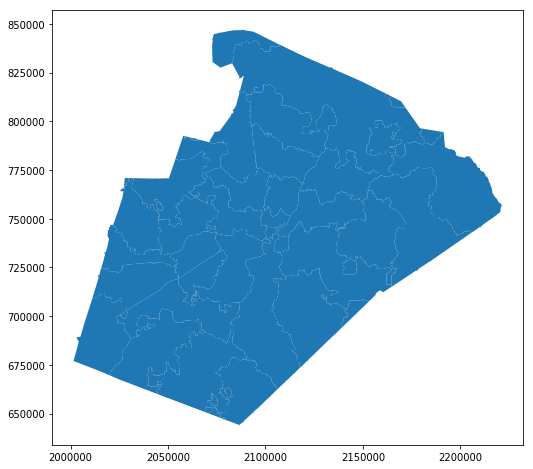

In [21]:
map_df.plot(figsize=(10, 8));


In [ ]:
fp = 'Shp_files/Zip_Codes.shp'

map_df = gpd.read_file(fp)
#map_df.ZIPNUM.astype(float)
map_df.head()

In [38]:
locs = pd.read_csv('Source_files/Fire_Data_for_mapping.csv', header=0, low_memory=False)
#locs.Zip_num.astype(float)
locs.head()

,OBJECTID,ZIPNUM,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,...,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,27603,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,10/19/2013 21:52,10/19/2013 21:59,10/19/2013 21:47,0,13-0030918,...,Outside rubbish fire Other,B,22.0,-78.53732007,35.89162234,2013,10/19/2013,0 days 00:05:00.000000000,300.0,Fire
1,474770,27615,"7513 IDOLBROOK LN RALEIGH, NC 27615",NaN,,2/14/2014 21:49,2/14/2014 21:51,2/14/2014 21:46,0,14-0004846,...,Person in distress Other,A,4.0,-78.64763064,35.87818584,2014,2/14/2014,0 days 00:03:00.000000000,180.0,Service Call
2,474771,27601,"1205 S BLOODWORTH ST RALEIGH, NC 27601",NaN,,4/29/2012 5:17,4/29/2012 5:38,4/29/2012 5:16,0,12-0011779,...,Electrical wiring/equipment problem Other,A,1.0,-78.63397664,35.76538782,2012,4/29/2012,0 days 00:01:00.000000000,60.0,Hazardous Condition (No Fire)
3,474772,27601,"7628 VALVIEW ST RALEIGH, NC 27601",NaN,,4/28/2012 23:46,4/28/2012 23:52,4/28/2012 23:43,0,12-9010131,...,Unauthorized burning,A,18.0,-78.69139555,35.88444729,2012,4/28/2012,0 days 00:03:00.000000000,180.0,Service Call
4,474773,27603,"4201 MANGROVE DR RALEIGH, NC 27603",NaN,,1/26/2014 22:35,1/26/2014 22:38,1/26/2014 22:31,0,14-0002916,...,Water problem Other,B,28.0,-78.51656019,35.87272475,2014,1/26/2014,0 days 00:04:00.000000000,240.0,Service Call


In [107]:
df = locs.loc[locs['Incident']=='Fire']
df.head()

,OBJECTID,ZIPNUM,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,...,incident_type_description,platoon,station,Longitude,Latitude,Year,Date,Arr Time,Seconds,Incident
0,474769,27603,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,10/19/2013 21:52,10/19/2013 21:59,10/19/2013 21:47,0,13-0030918,...,Outside rubbish fire Other,B,22.0,-78.53732007,35.89162234,2013,10/19/2013,0 days 00:05:00.000000000,300.0,Fire
13,474782,27614,"2804 POLESDON CT RALEIGH, NC 27614",NaN,,8/15/2011 23:20,8/16/2011 0:40,8/15/2011 23:15,0,11-0023672,...,Building fire,C,22.0,-78.5907717,35.89973754,2011,8/15/2011,0 days 00:05:00.000000000,300.0,Fire
18,474787,27601,"306 PELL ST RALEIGH, NC 27601",NaN,,12/18/2008 16:13,12/18/2008 16:53,12/18/2008 16:10,0,08-0035563,...,Fire Other,C,3.0,-78.63423903,35.78729063,2008,12/18/2008,0 days 00:03:00.000000000,180.0,Fire
39,474814,27601,"4725 OAK PARK RD RALEIGH, NC 27601",NaN,,4/22/2014 23:23,4/23/2014 0:43,4/22/2014 23:18,0,14-0011716,...,Building fire,C,17.0,-78.70252317,35.84659859,2014,4/22/2014,0 days 00:05:00.000000000,300.0,Fire
41,474816,27601,"6509 THE LAKES DR RALEIGH, NC 27601",NaN,,4/3/2009 2:31,4/3/2009 2:45,4/3/2009 2:26,0,09-0009421,...,Passenger vehicle fire,B,15.0,-78.6276988,35.86834545,2009,4/3/2009,0 days 00:05:00.000000000,300.0,Fire


In [40]:
len(df)

13360

In [56]:
#merged = map_df.set_index('ZIPNUM').join(df.set_index('ZIPNUM'))
df['ZIPNUM']=df['ZIPNUM'].astype(float)
map_df['ZIPNUM']=map_df['ZIPNUM'].astype(float)

merged_df = pd.merge(df, map_df, on='ZIPNUM', how='left')
#merged_df = pd.concat([df, map_df], ignore_index=True, sort=False)
merged_df.head()

,OBJECTID_x,ZIPNUM,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,...,Seconds,Incident,OBJECTID_y,ZIPNAME,ZIPCODE,NAME,SHAPEAREA,SHAPELEN,LAST_EDITE,geometry
0,474769,27603.0,"8332 SHILOH CREEK CT RALEIGH, NC 27603",NaN,,10/19/2013 21:52,10/19/2013 21:59,10/19/2013 21:47,0,13-0030918,...,300.0,Fire,9,RALEIGH,RALEIGH 27603,RALEIGH,1.370093e+09,307993.039185,None,"POLYGON ((2087116.974364921 699242.4094022959,..."
1,474782,27614.0,"2804 POLESDON CT RALEIGH, NC 27614",NaN,,8/15/2011 23:20,8/16/2011 0:40,8/15/2011 23:15,0,11-0023672,...,300.0,Fire,28,RALEIGH,RALEIGH 27614,RALEIGH,8.235188e+08,226664.267937,2018-01-22T13:33:47.000Z,"POLYGON ((2111737.648691848 787165.994764179, ..."
2,474782,27614.0,"2804 POLESDON CT RALEIGH, NC 27614",NaN,,8/15/2011 23:20,8/16/2011 0:40,8/15/2011 23:15,0,11-0023672,...,300.0,Fire,40,RALEIGH,RALEIGH 27614,RALEIGH,3.920281e+06,8610.262956,2017-05-17T08:54:53.000Z,"POLYGON ((2095277.049636513 814690.5761658102,..."
3,474787,27601.0,"306 PELL ST RALEIGH, NC 27601",NaN,,12/18/2008 16:13,12/18/2008 16:53,12/18/2008 16:10,0,08-0035563,...,180.0,Fire,1,RALEIGH,RALEIGH 27601,RALEIGH,5.076012e+07,43129.419803,None,"POLYGON ((2109890.250034124 740738.4381129295,..."
4,474814,27601.0,"4725 OAK PARK RD RALEIGH, NC 27601",NaN,,4/22/2014 23:23,4/23/2014 0:43,4/22/2014 23:18,0,14-0011716,...,300.0,Fire,1,RALEIGH,RALEIGH 27601,RALEIGH,5.076012e+07,43129.419803,None,"POLYGON ((2109890.250034124 740738.4381129295,..."


In [57]:
len(merged_df)

13428

AttributeError: Unknown property edgecolor

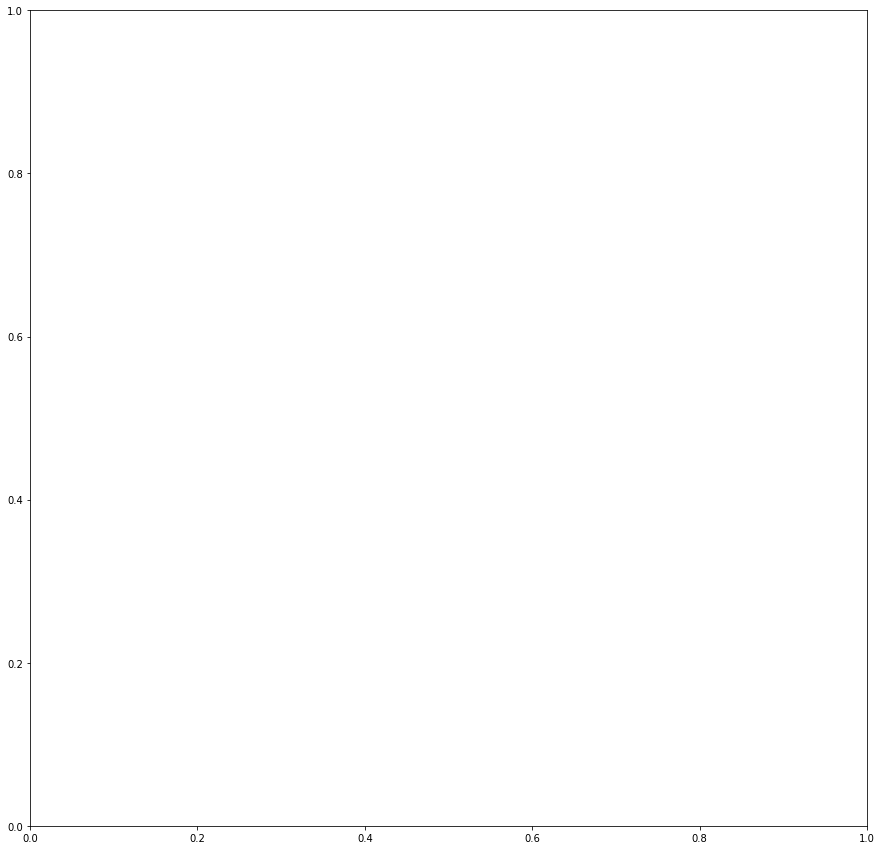

In [94]:
# set a variable that will call column to visualise on the map

variable = 'ZIPNUM'

# set the range for the choropleth

vmin, vmax = 50, 2000

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(15, 15))

# create map

variable = 'ZIPNUM'

merged_df.plot(variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8');
ax.axis('off')

ax.set_title('Fire Incident Rate in Wake County', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)

ax.annotate('2008-2018',
            xy=(0.001, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)

In [ ]:
fig.savefig("Fire Incident Rate in Wake County 2008-2018.png", dpi=300)

AttributeError: Unknown property column

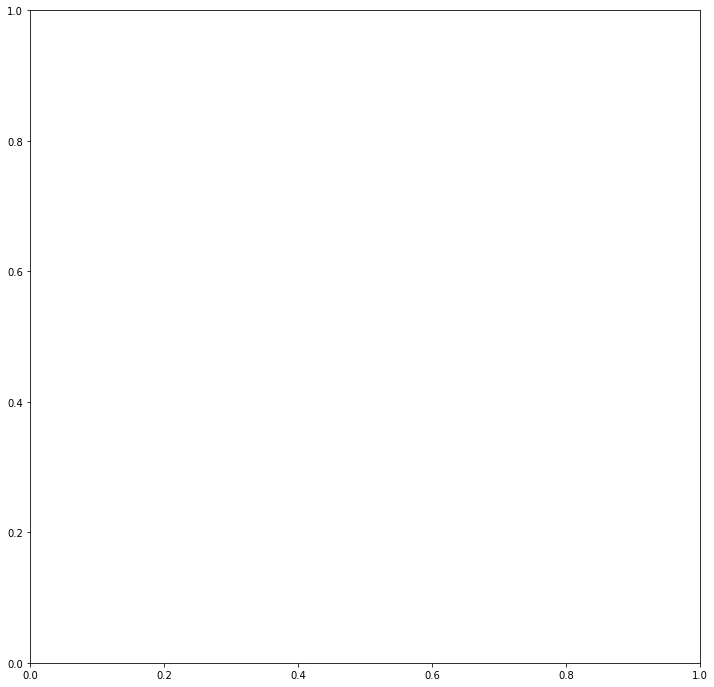

In [66]:
output_path = 'Maps'

# counter for the for loop
i = 0

# list of years
list_of_years = ['2008','2009','2010','2011','2012','2013','2014','2015','2016', '2017', '2018']

vmin, vmax = 5, 100


for year in list_of_years:
    
    plot_year=merged_df.loc[merged_df['Year']==int(year)]
    geo_plot_year = gpd.GeoDataFrame(plot_year)
    fig = merged_df.plot(column=variable, cmap='Reds', figsize=(12,12),
                         linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
                         legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # removes axis
    fig.axis('off')
    
    # add a title
    fig.set_title('Fire Incidents in Wake County', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # add an annotation
    fig.annotate(int(year),
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    filepath = os.path.join(output_path, year+'_fires.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300);
    